# Proyek Analisis Data: Air Quality Dataset 
- **Nama:** Matthew Mahendra
- **Email:** m002b4ky2431@bangkit.academy
- **ID Dicoding:** matt_mahen

## Menentukan Pertanyaan Bisnis

- Dari kota-kota pada dataset, manakah yang memiliki index kualitas udara terbaik pada tahun 2013-2017?
- Bagaimana trend dari setiap polutan untuk setiap jam dari tahun 2013-2014?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

## Data Wrangling

### Gathering Data
Terdapat beberapa dataset terkait data udara. Akan dikumpulkan dan dijadikan sebuah dataset tersendiri

Menggunakan library os, dibaca semua file pada folder data yang mengandung dataset dalam format csv

In [2]:
csv_files = []
for path, _, files in os.walk('./data', topdown=True):
    for file in files:
        if re.match(r'.+\.csv', file) != None:
            csv_files.append(path + '/' + file)

csv_files

['./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 './data/PRSA_Data_Changping_20130301-20170228.csv',
 './data/PRSA_Data_Dingling_20130301-20170228.csv',
 './data/PRSA_Data_Dongsi_20130301-20170228.csv',
 './data/PRSA_Data_Guanyuan_20130301-20170228.csv',
 './data/PRSA_Data_Gucheng_20130301-20170228.csv',
 './data/PRSA_Data_Huairou_20130301-20170228.csv',
 './data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 './data/PRSA_Data_Shunyi_20130301-20170228.csv',
 './data/PRSA_Data_Tiantan_20130301-20170228.csv',
 './data/PRSA_Data_Wanliu_20130301-20170228.csv',
 './data/PRSA_Data_Wanshouxigong_20130301-20170228.csv']

Untuk setiap file csv, akan dikonkat menjadi sebuah dataset besar

In [3]:
df = pd.read_csv(csv_files[0])

for file in csv_files[1:]:
    temp_df = pd.read_csv(file)
    df = pd.concat([df, temp_df])

df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Insight:**
- Terdapat 12 dataset yang memiliki fitur-fitur yang sama
- Terdapat 420.768 instans data

### Assessing Data
Akan diperiksa apakah ada kolom yang memiliki nilai null/NaN serta instans data yang duplikat

Akan diperiksa apakah terdapat kolom yang memiliki nilai True jika diperiksa isnull

In [4]:
df.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [5]:
df.isna().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

Akan dihitung jumlah instans data yang bernilai NaN atau null

In [6]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [7]:
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Akan dihitung jumlah data yang duplikat

In [8]:
df.duplicated().sum()

0

**Insight:**
- Terdapat beberapa fitur dengan nilai null/NaN

### Cleaning Data
Dataset akan dibersihkan untuk nilai yang null dengan interpolasi untuk data numerik dan dengan imputasi untuk data kategorikal

Index diset pada kolom `No`

In [9]:
df = df.set_index('No')

Interpolasi data numerik dengan method `linear`

In [10]:
for feat in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']:
    df[feat].interpolate(method='linear', inplace=True)

Imputasi data kategorikal dengan metode kategori terbanyak

In [11]:
df['wd'].value_counts()

NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64

In [12]:
df['wd'] = df['wd'].fillna(value='NE')

Periksa kembali jumlah NaN dan null

In [13]:
df.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [14]:
df.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Dataset sudah dibersihkan dengan jumlah instans NaN dan null sudah 0

## Exploratory Data Analysis (EDA)

Mendapatkan nilai statistik untuk semua fitur, baik numerikal maupun kategorikal

In [15]:
df.describe(include='all')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
std,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,NaN,1.246674,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


Memperlihatkan kolom-kolom pada dataset

In [16]:
df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

Memperlihatkan tahun-tahun yang terdapat pada dataset

In [17]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

Memperlihatkan jumlah stasiun yang unik beserta jumlah data per pengamatannya

In [18]:
df['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [19]:
df['station'].value_counts()

Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: station, dtype: int64

Memperlihatkan jumlah unik kolom RAIN per nilainya

In [20]:
df['RAIN'].value_counts()

0.0     404241
0.1       3724
0.2       1841
0.3       1382
0.4        909
         ...  
17.3         1
36.1         1
18.2         1
26.7         1
22.4         1
Name: RAIN, Length: 256, dtype: int64

Melakukan korelasi antar fitur pada dataset untuk menentukan fitur-fitur yang berkorelasi tinggi

C:\Users\Matthew\AppData\Local\Temp\ipykernel_14276\2341891244.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


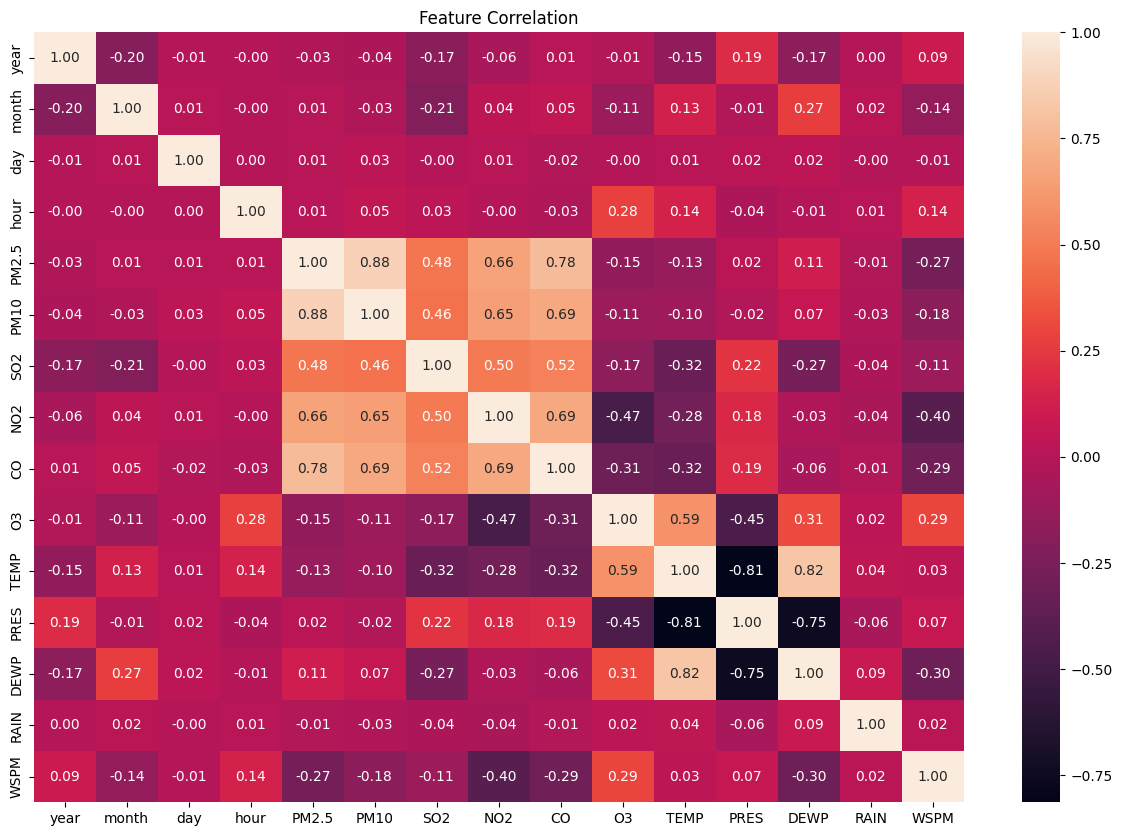

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title("Feature Correlation")
plt.show()

### Explore Air Quality (bagian dari teknik analisis lanjutan menggunakan rule air quality index)
Menggunakan kadar O3, NO2, SO2, PM10, dan PM2.5 untuk menentukan index

Sumber: https://ecmwf-projects.github.io/copernicus-training-cams/proc-aq-index.html

In [22]:
def air_quality_index(row):
    if (row['O3'] >= 380 or row['NO2'] >= 340 or row['SO2'] >= 750 or row['PM10'] >= 150 or row['PM2.5'] >= 75):
        return 6
    elif (240 <= row['O3'] < 380 or 230 <= row['NO2'] < 340 or 500 <= row['SO2'] < 750 or 100 <= row['PM10'] < 150 or 50 <= row['PM2.5'] < 75):
        return 5
    elif (130 <= row['O3'] < 240 or 120 <= row['NO2'] < 230 or 350 <= row['SO2'] < 500 or 50 <= row['PM10'] < 100 or 25 <= row['PM2.5'] < 50):
        return 4
    elif (100 <= row['O3'] < 130 or 90 <= row['NO2'] < 120 or 200 <= row['SO2'] < 350 or 40 <= row['PM10'] < 50 or 20 <= row['PM2.5'] < 25):
        return 3
    elif (50 <= row['O3'] < 100 or 40 <= row['NO2'] < 90 or 100 <= row['SO2'] < 200 or 20 <= row['PM10'] < 40 or 10 <= row['PM2.5'] < 20):
        return 2
    elif (0 <= row['O3'] < 50 and 0 <= row['NO2'] < 40 and 0 <= row['SO2'] < 100 and 0 <= row['PM10'] < 20 and 0 <= row['PM2.5'] < 10):
        return 1
    else:
        return None

In [23]:
df['air_quality'] = df.apply(air_quality_index, axis= 1)
df['air_quality'].value_counts()

6    175338
4     82603
2     67977
5     62793
3     24896
1      7161
Name: air_quality, dtype: int64

In [24]:
city_air_quality = df.groupby(['station', 'air_quality']).size().reset_index(name='count')
city_air_quality

,station,air_quality,count
0,Aotizhongxin,1,424
1,Aotizhongxin,2,5262
2,Aotizhongxin,3,2100
3,Aotizhongxin,4,6799
4,Aotizhongxin,5,5221
...,...,...,...
67,Wanshouxigong,2,5020
68,Wanshouxigong,3,1771
69,Wanshouxigong,4,6568
70,Wanshouxigong,5,5444


**Insights:**
- Jumlah fitur adalah 17 fitur, 1 kolom nomor (ID)
- Terdapat data dari tahun 2013 hingga 2017 pada dataset
- Terdapat 12 stasiun pengamatan kualitas udara pada dataset
- Fitur rain mayoritas berada pada nilai 0, hanya sedikit yang tidak bernilai 0
- Skala untuk fitur kualitas udara berbeda-beda
- Jumlah pengamatan per stasiun equally distributed
- Terdapat beberapa kolom dengan korelasi tinggi seperti kadar PM2.5 dan PM10, DEWP dan TEMP, CO dan PM2.5, dll.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dari kota-kota pada dataset, manakah yang memiliki index kualitas udara terbaik pada tahun 2013-2017?

Pada grafik yang ditampilkan. Dapat dilihat bahwa semua kota lebih banyak memiliki kualitas udara dengan indeks 6 (paling buruk). Akan tetapi yang memiliki jumlah indeks 6 paling sedikit dan dengan indeks 2 terbesar adalah kota Dingling. Maka dari itu kota Dingling merupakan kota dengan kualitas udara yang terbaik di antara kota-kota pada dataset ini, meskipun jumlah kualitas udara paling buruknya masih tinggi

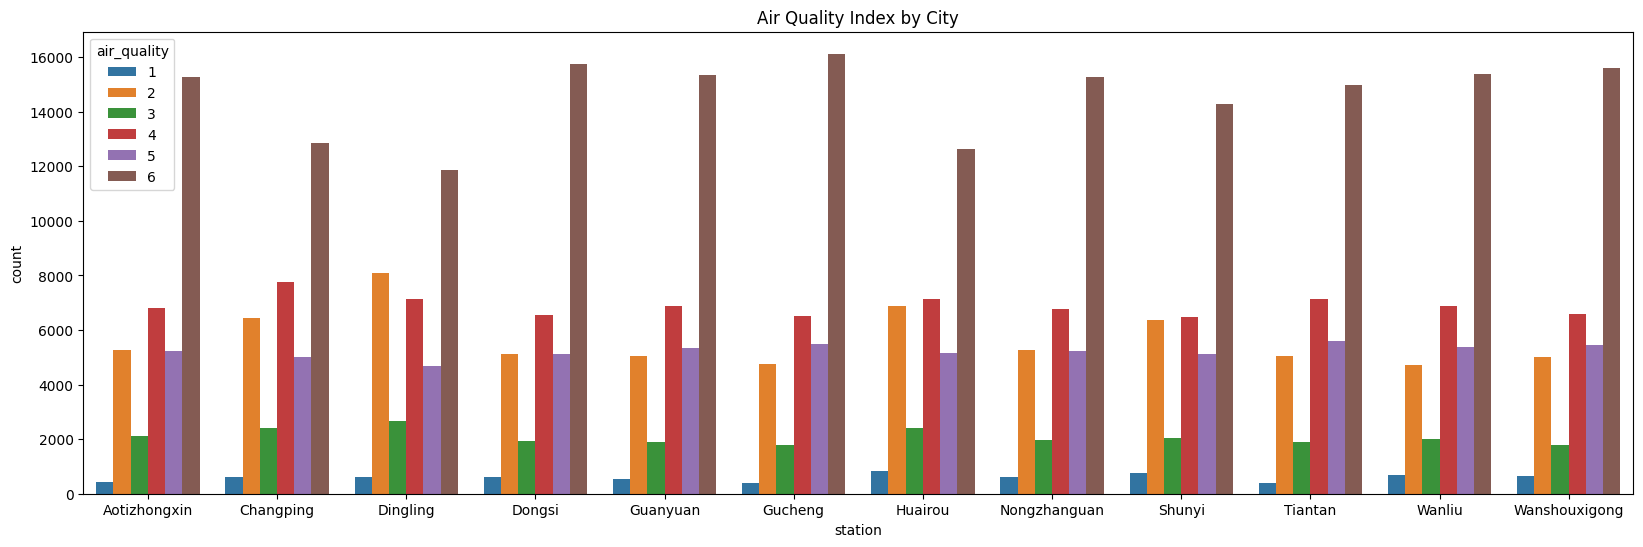

In [25]:
plt.figure(figsize=(20,6))
sns.barplot(x='station', y='count', hue='air_quality', data=city_air_quality)
plt.title('Air Quality Index by City')
plt.show()

### Pertanyaan 2: Bagaimana trend dari setiap polutan untuk setiap jam dari tahun 2013-2014?
Untuk setiap jam setiap hari dari tahun 2013-2014 diperoleh grafik untuk setiap fitur kadar polutan dan statistik suhu dan tekanan sebagai berikut.

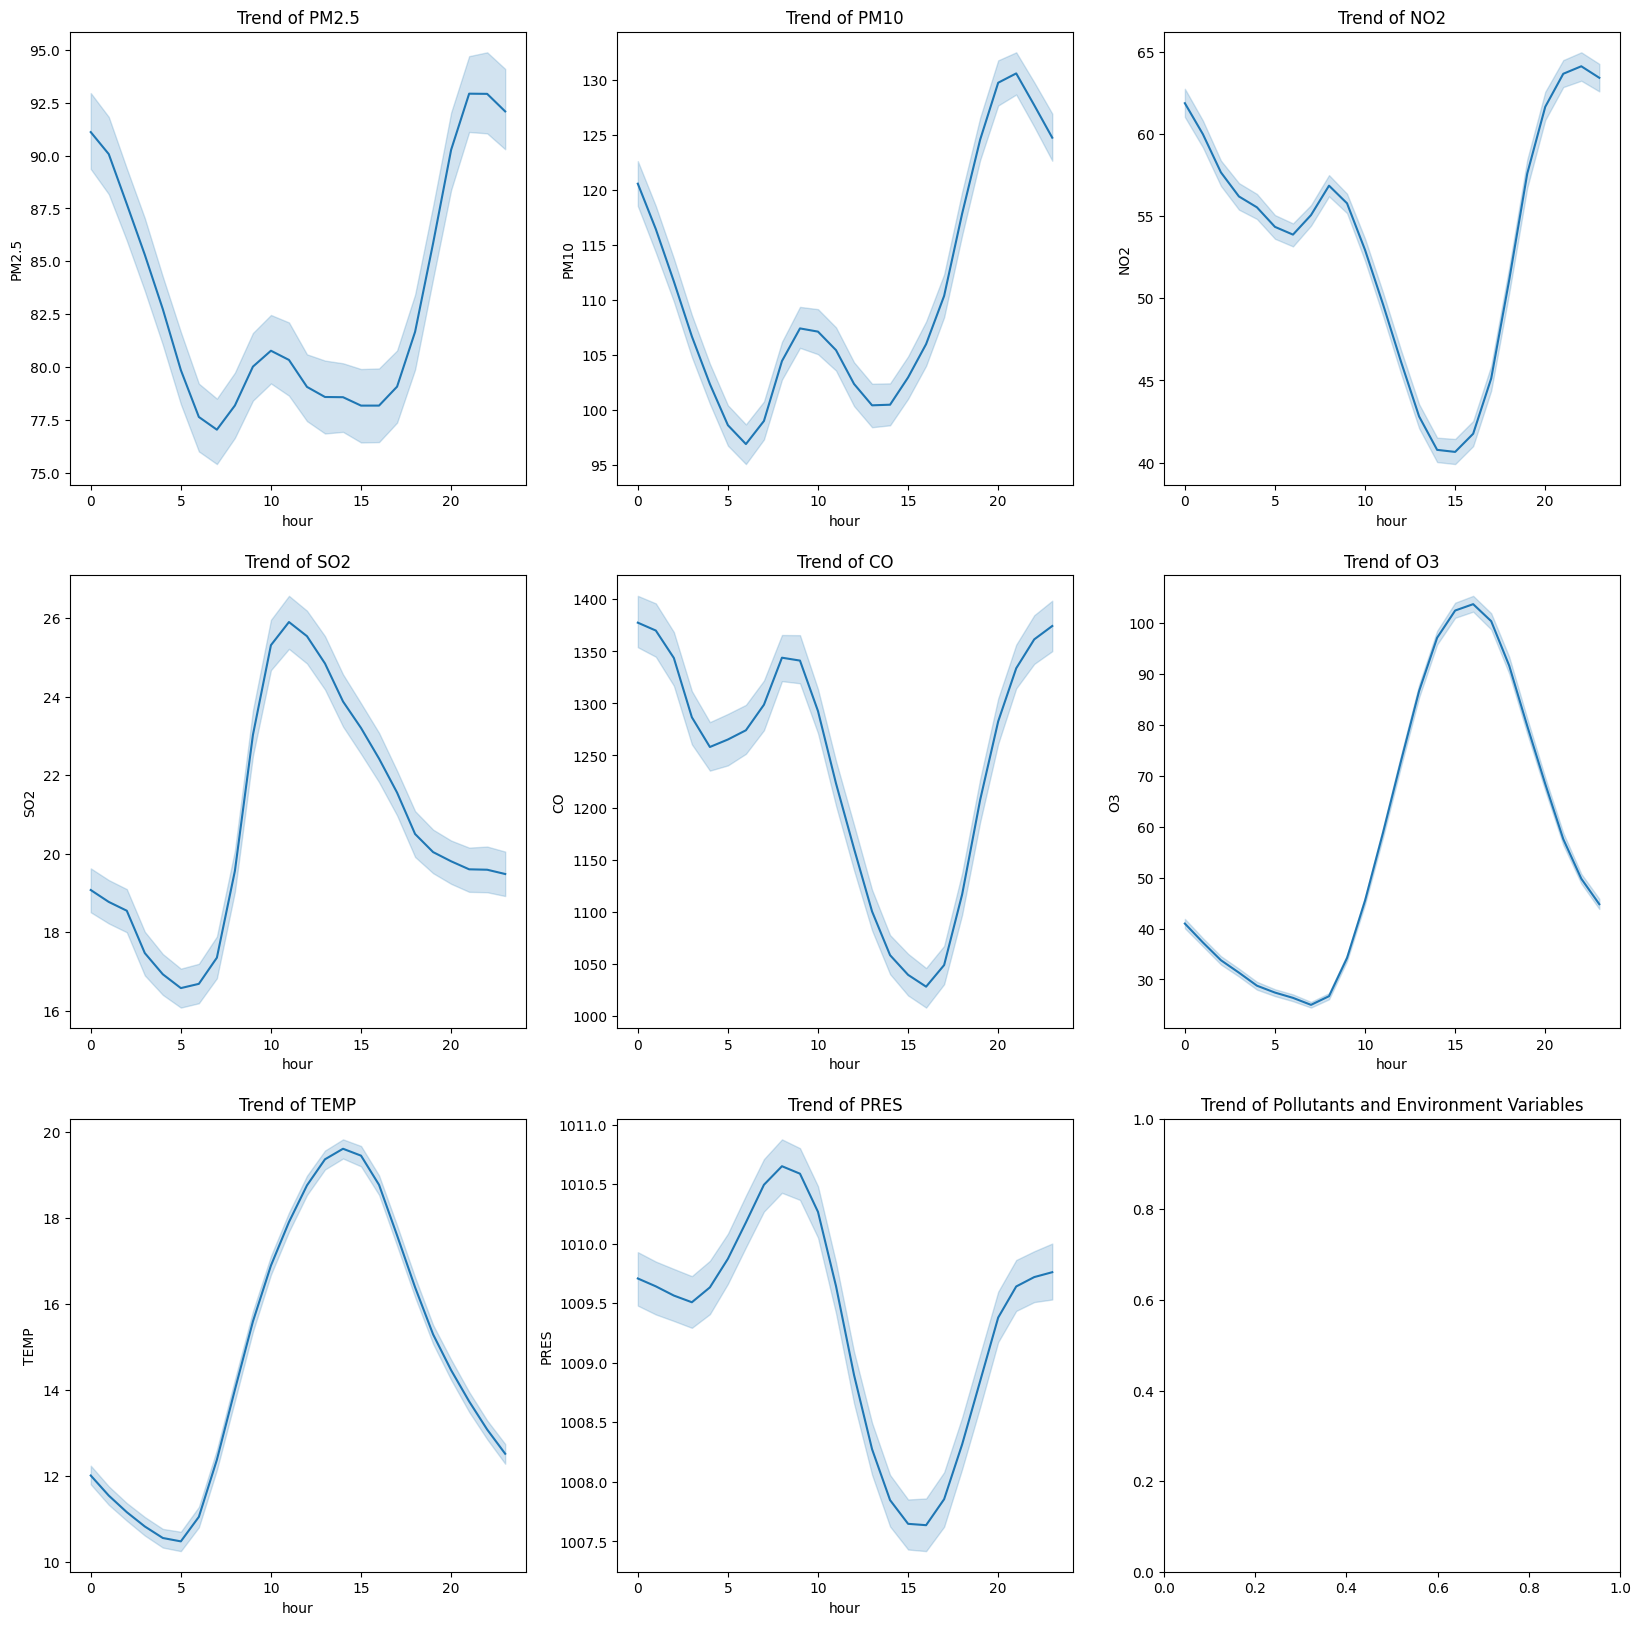

In [28]:
feats = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'TEMP', 'PRES']
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()

for i, feat in enumerate(feats):
    sns.lineplot(df[(df['year'] >= 2013) & (df['year'] <= 2014)], x='hour', y=feat, ax=ax[i])
    ax[i].set_title(f"Trend of {feat}")

plt.title("Trend of Pollutants and Environment Variables")

plt.show()

**Insight:**
- Hampir semua kota memiliki kadar udara sangat buruk
- Ada tren untuk peningkatan dan penurunan kadar polutan pada jam-jam tertentu

## Conclusion

- Kota dengan kualitas udara terbaik pada dataset adalah kota Dingling
- Terdapat tren kenaikan dan penurunan kadar polutan pada jam-jam tertentu. Jam-jam ini bisa jadi dikaitkan dengan pergerakan kendaraan dengan emisi tinggi di malam hingga subuh atau pada saat rush hour